<a href="https://colab.research.google.com/github/Priyanka3008/TextClassification_NLP/blob/main/LargeData_TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Data Collection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')

In [ ]:
train_data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
test_data.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [ ]:
train_data.tail()

,Class Index,Title,Description
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119999,2,Nets get Carter from Raptors,INDIANAPOLIS -- All-Star Vince Carter was trad...


In [ ]:
test_data.tail()

,Class Index,Title,Description
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...
7599,3,EBay gets into rentals,EBay plans to buy the apartment and home renta...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   int64 
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.2+ KB


In [ ]:
print(train_data.shape)
print(test_data.shape)

(120000, 3)
(7600, 3)


In [ ]:
train_data.duplicated().sum()

0

In [ ]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [ ]:
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

Class Index    0
Title          0
Description    0
dtype: int64

Class Index    0
Title          0
Description    0
dtype: int64


In [ ]:
train_data['Summary']=train_data['Title']+' '+train_data['Description']
test_data['Summary']=test_data['Title']+' '+test_data['Description']

In [ ]:
labels={1:'World News',2:'Sports News',3:'Business News',4:'Science&Tech News'}
train_data['Labels']=train_data['Class Index'].map(labels)
test_data['Labels']=test_data['Class Index'].map(labels)

In [ ]:
train_data['Labels'].value_counts()

,count
Labels,
Business News,30000
Science&Tech News,30000
Sports News,30000
World News,30000


In [ ]:
test_data['Labels'].value_counts()

,count
Labels,
Business News,1900
Science&Tech News,1900
Sports News,1900
World News,1900


The data is balanced

<Axes: xlabel='Labels', ylabel='count'>

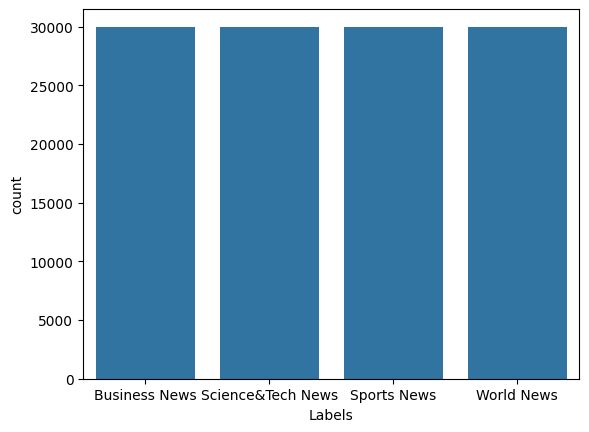

In [ ]:
sns.countplot(train_data,x='Labels')

<Axes: xlabel='Labels', ylabel='count'>

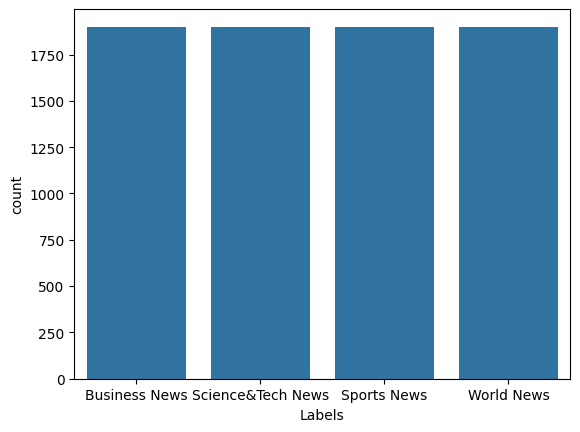

In [ ]:
sns.countplot(test_data,x='Labels')

In [ ]:
def remove_url(text):
    url_pattern=re.compile(r'https?://\S+|www\.\S+|\.\w+', flags=re.IGNORECASE)
    return url_pattern.sub(r'',text)

In [ ]:
def striphtml(text):
  p=re.compile(r'<.*?>|\.')
  return p.sub('',text)

In [ ]:
train_data['Summary']=train_data['Summary'].apply(remove_url)
test_data['Summary']=test_data['Summary'].apply(remove_url)

In [ ]:
train_data['Summary']=train_data['Summary'].apply(striphtml)
test_data['Summary']=test_data['Summary'].apply(striphtml)

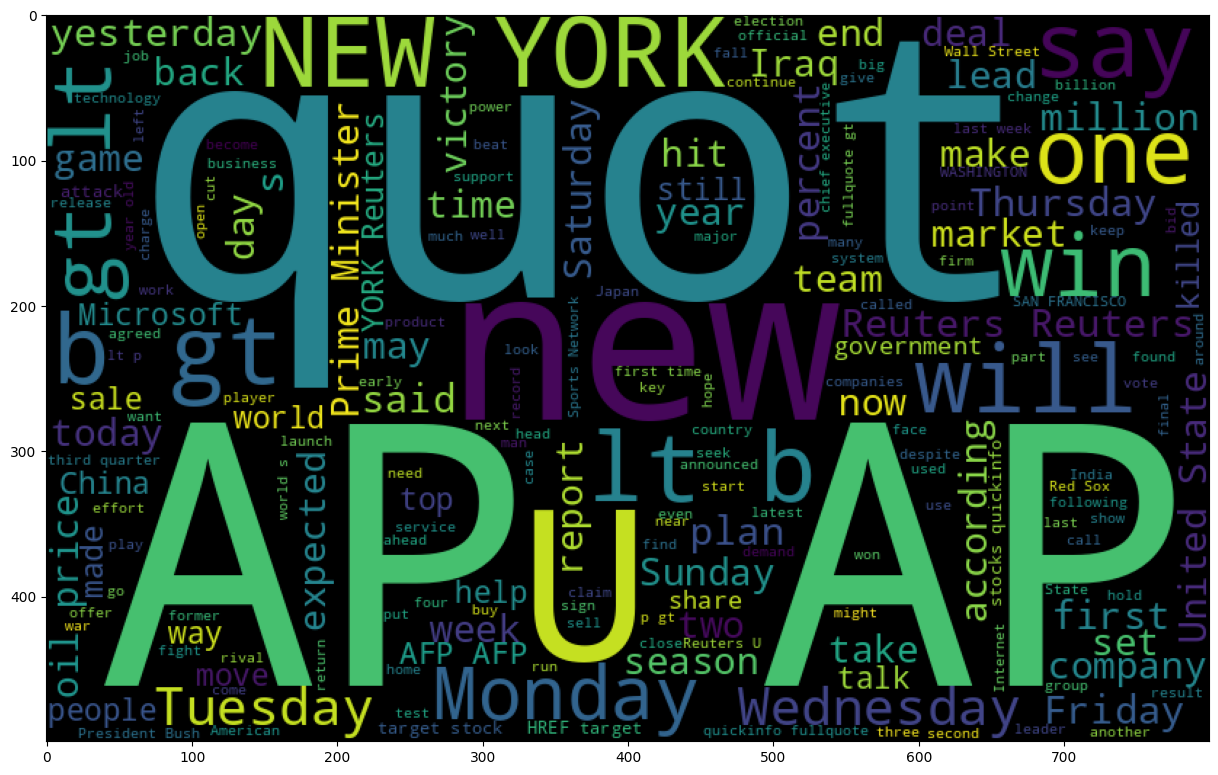

In [ ]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,background_color='black').generate(''.join(train_data['Summary']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)

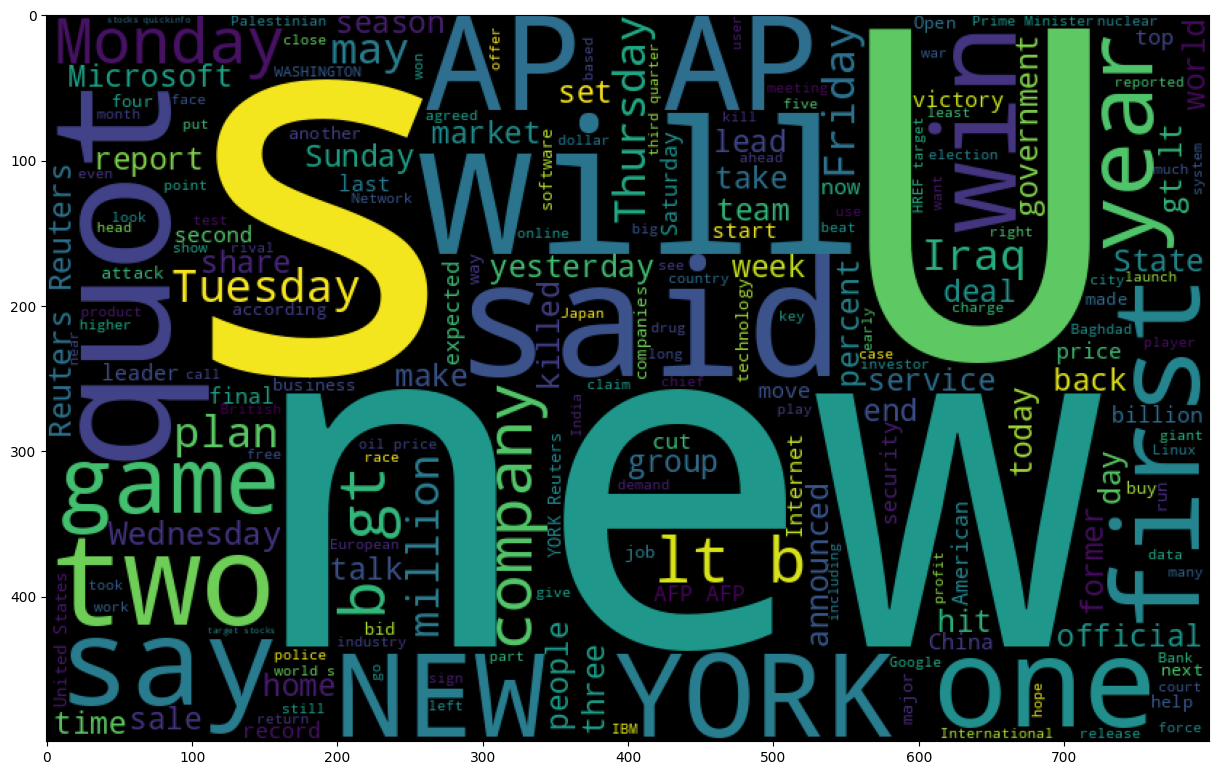

In [ ]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,background_color='black').generate(''.join(test_data['Summary']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)

In [ ]:
train_data=train_data.drop(columns=['Title','Description'],axis=1)
test_data=test_data.drop(columns=['Title','Description'],axis=1)

In [ ]:
train_data

,Class Index,Summary,Labels
0,3,Wall St Bears Claw Back Into the Black (Reuter...,Business News
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Business News
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business News
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Business News
4,3,"Oil prices soar to all-time record, posing new...",Business News
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,World News
119996,2,Renteria signing a top-shelf deal Red Sox gene...,Sports News
119997,2,Saban not going to Dolphins yet The Miami Dolp...,Sports News
119998,2,Today's NFL games PITTSBURGH at NY GIANTS Time...,Sports News


In [ ]:
test_data

,Class Index,Summary,Labels
0,3,Fears for T N pension after talks Unions repre...,Business News
1,4,The Race is On: Second Private Team Sets Launc...,Science&Tech News
2,4,Ky Company Wins Grant to Study Peptides (AP) A...,Science&Tech News
3,4,Prediction Unit Helps Forecast Wildfires (AP) ...,Science&Tech News
4,4,Calif Aims to Limit Farm-Related Smog (AP) AP ...,Science&Tech News
...,...,...,...
7595,1,Around the world Ukrainian presidential candid...,World News
7596,2,Void is filled with Clement With the supply of...,Sports News
7597,2,Martinez leaves bitter Like Roger Clemens did ...,Sports News
7598,3,5 of arthritis patients in Singapore take Bext...,Business News


In [ ]:
def tolower(text):
  return text.lower()
train_data['Summary']=train_data['Summary'].apply(tolower)
test_data['Summary']=test_data['Summary'].apply(tolower)

In [ ]:
import string
def remove_punctuation(text):
    punctuation_free = "".join([i for i in text if i not in string.punctuation])
    return punctuation_free

In [ ]:
def remove_digits(text):
    result = ''.join([i for i in text if not i.isdigit()])
    return result

In [ ]:
train_data['Summary']=train_data['Summary'].apply(remove_punctuation)
test_data['Summary']=test_data['Summary'].apply(remove_punctuation)

In [ ]:
train_data['Summary']=train_data['Summary'].apply(remove_digits)
test_data['Summary']=test_data['Summary'].apply(remove_digits)

In [ ]:
train_data.head()

,Class Index,Summary,Labels
0,3,wall st bears claw back into the black reuters...,Business News
1,3,carlyle looks toward commercial aerospace reut...,Business News
2,3,oil and economy cloud stocks outlook reuters r...,Business News
3,3,iraq halts oil exports from main southern pipe...,Business News
4,3,oil prices soar to alltime record posing new m...,Business News


In [ ]:
test_data.head()

,Class Index,Summary,Labels
0,3,fears for t n pension after talks unions repre...,Business News
1,4,the race is on second private team sets launch...,Science&Tech News
2,4,ky company wins grant to study peptides ap ap ...,Science&Tech News
3,4,prediction unit helps forecast wildfires ap ap...,Science&Tech News
4,4,calif aims to limit farmrelated smog ap ap so...,Science&Tech News


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def token_wordremoval(text):
    stop_words=set(stopwords.words('english'))
    word_tokens=word_tokenize(text)
    filtered_text=[word for word in word_tokens if word not in stop_words]
    return filtered_text

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')
train_data['Summary']=train_data['Summary'].apply(token_wordremoval)
test_data['Summary']=test_data['Summary'].apply(token_wordremoval)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
WNL = WordNetLemmatizer()
def lemmatize_text(tokens):
  WNL = WordNetLemmatizer()
  return [WNL.lemmatize(word) for word in tokens]

train_data['Summary'] = train_data['Summary'].apply(lemmatize_text)
test_data['Summary'] = test_data['Summary'].apply(lemmatize_text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
train_data['Summary']=[' '.join(tok) for tok in train_data['Summary']]
test_data['Summary']=[' '.join(tokens) for tokens in test_data['Summary']]
tfidf_train_matrix = tfidf.fit_transform(train_data['Summary'])
tfidf_test_matrix = tfidf.transform(test_data['Summary'])

In [ ]:
import joblib
joblib.dump(tfidf,'tfidfVector.pkl')

['tfidfVector.pkl']

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model=MultinomialNB()
model.fit(tfidf_train_matrix,train_data['Labels'])

MultinomialNB()

In [ ]:
y_pred=model.predict(tfidf_test_matrix)

In [ ]:
accuracy_score(test_data['Labels'],y_pred)

0.9011842105263158

In [ ]:
print(test_data['Labels'].tolist()[:20])
print(y_pred.tolist()[:20])

['Business News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News']
['Business News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'World News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Business News']


<Axes: >

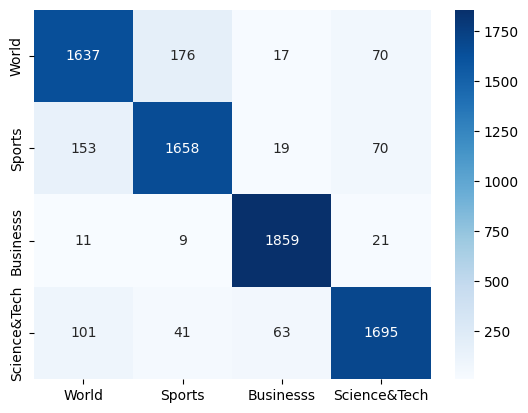

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_data['Labels'],y_pred)
conf_df=pd.DataFrame(cm,index=['World','Sports','Businesss','Science&Tech'],columns=['World','Sports','Businesss','Science&Tech'])
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',xticklabels=['World','Sports','Businesss','Science&Tech'],yticklabels=['World','Sports','Businesss','Science&Tech'])

In [ ]:
import joblib
joblib.dump(model,'MNBClassifier.pkl')
print("Model Saved")

Model Saved
